# Interactive Object Measurement

This notebook demonstrates the interactive measurement tool for analyzing microbial colonies on agar plates.

## Setup

First, ensure you have the interactive dependencies installed:

```bash
pip install phenotypic[interactive]
```


In [ ]:
import phenotypic as pht
from phenotypic.detect import OtsuDetector
from phenotypic.enhance import GaussianBlur
import matplotlib.pyplot as plt


## Load and Preprocess Image

Load a sample colony image and apply preprocessing.


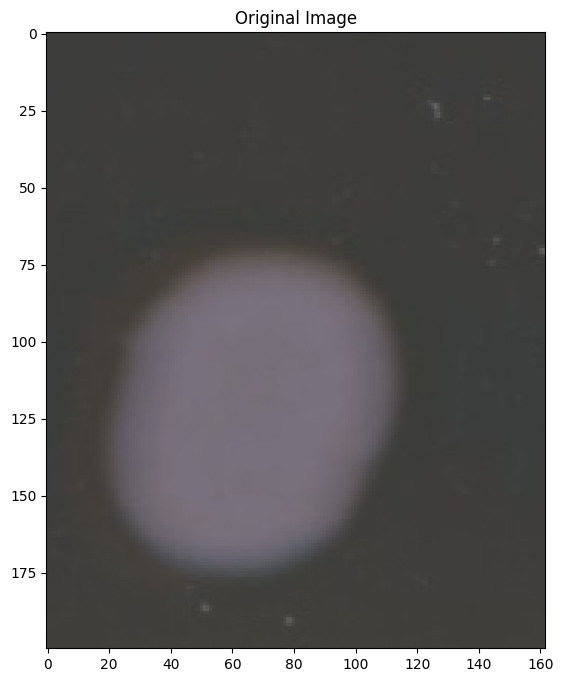

Image shape: (200, 162, 3)
Image bit depth: 8


In [ ]:
# Load sample image
arr = pht.data.load_colony()
image = pht.Image(arr, name='colony_sample')

# Show original image
fig, ax = image.show(figsize=(8, 8))
plt.title('Original Image')
plt.show()

print(f"Image shape: {image.shape}")
print(f"Image bit depth: {image.bit_depth}")


## Apply Detection

Use Gaussian blur for noise reduction and Otsu thresholding for object detection.


Detected 6 objects


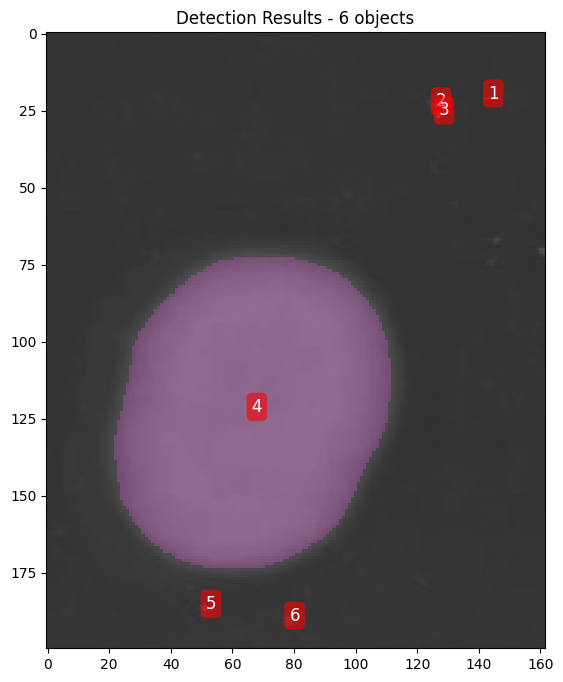

In [ ]:
# Apply Gaussian blur
blur = GaussianBlur(sigma=2)
blur.apply(image)

# Detect objects
detector = OtsuDetector(ignore_zeros=True, ignore_borders=True)
detector.apply(image, inplace=True)

print(f"Detected {image.num_objects} objects")

# Show detection results
fig, ax = image.show_overlay(figsize=(8, 8), show_labels=True)
plt.title(f'Detection Results - {image.num_objects} objects')
plt.show()


## Launch Interactive Measurement Tool

The interactive tool allows you to:
- **Click on objects** to select/deselect them
- **View area measurements** in real-time
- **Adjust overlay transparency** with a slider
- **Export measurements** to CSV

Run the cell below to launch the tool inline in the notebook:


In [ ]:
# Launch inline in notebook
image.interactive_measure(
        mode='inline',
        height=700,
        port=8050
)


/Users/alex/Projects/PhenoTypic/.venv/lib/python3.11/site-packages/dash/dash.py:642: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



### Display Issues in Jupyter


If the tool doesn't display in Jupyter:

1. Ensure jupyter-dash is installed
2. Try restarting the kernel
3. Use external mode as fallback:

```
image.interactive_measure(mode='external')
```

## Comparison: Non-Interactive Measurement

For comparison, here's how to calculate measurements programmatically without the interactive tool:


In [ ]:
from phenotypic.measure import MeasureSize

# Calculate size measurements for all objects
measurer = MeasureSize()
measurements = measurer.measure(image, include_meta=True)

print(f"\nMeasurements for {len(measurements)} objects:")
print(measurements.head(10))

# Summary statistics
print(f"\nSummary Statistics:")
print(f"Total area: {measurements['Size_Area'].sum():.0f} pixels")
print(f"Mean area: {measurements['Size_Area'].mean():.1f} pixels")
print(f"Std area: {measurements['Size_Area'].std():.1f} pixels")



Measurements for 6 objects:
   Metadata_BitDepth Metadata_ImageType Metadata_ParentImageName  \
0                  8              Image                      b''   
1                  8              Image                      b''   
2                  8              Image                      b''   
3                  8              Image                      b''   
4                  8              Image                      b''   
5                  8              Image                      b''   

  Metadata_ImageName  ObjectLabel  Bbox_CenterRR  Bbox_CenterCC  Bbox_MinRR  \
0      colony_sample            1      21.000000     143.000000          21   
1      colony_sample            2      23.500000     126.000000          23   
2      colony_sample            3      26.500000     127.000000          26   
3      colony_sample            4     122.742782      66.230011          73   
4      colony_sample            5     186.666667      51.333333         186   
5      colony_sample